# **TechWorks Consulting Salary Determination Machine Learning (ML) Project**

## **QUESTION AND ANSWERS**

## 1. Views on Salary Prediction ML Project Problem Statement?

* This represents a classic regression problem with direct business application. 
* Can help reduce unconscious bias in the salary determination process.
* Success depends on both statistical performance and business usefulness.
* Provides an opportunity to apply feature engineering techniques to capture candidate qualifications.
* Will likely need regular retraining as market conditions evolve.
* Demonstrates practical application of machine learning in the human resources domain.

## 2. Approach to Solving the Salary Prediction Task?

My approach to building a machine learning model for predicting new hire salaries would follow these essential steps:

1. **Data Exploration and Understanding**
   * I would begin by thoroughly analyzing the provided dataset to understand its structure, features, and potential patterns.
   * This would include examining the distribution of salaries, identifying correlations between variables, and detecting potential outliers or missing values.

2. **Data Preprocessing and Feature Engineering**
   * I would clean the data by handling missing values, addressing outliers, and standardizing or normalizing numerical features as needed.
   * Categorical variables would need encoding (one-hot encoding, label encoding, or target encoding, depending on their nature).
   * I would create new features that might better capture the relationship between candidate attributes and salary, such as years of experience squared or interaction terms.

3. **Feature Selection**
   * I would identify the most relevant features that influence salary determination, using techniques like correlation analysis, feature importance from tree-based models, or recursive feature elimination.
   * This step helps improve model performance and interpretability by focusing on truly impactful variables.

4. **Model Selection and Training**
   * I would implement multiple regression algorithms, starting with simpler models like Linear Regression as a baseline.
   * I would then explore more complex models such as Random Forest, Gradient Boosting (XGBoost, LightGBM), or even neural networks if appropriate.
   * For each model, I would use cross-validation to ensure reliable performance estimates.

5. **Model Evaluation and Comparison**
   * I would evaluate models using multiple metrics relevant to salary prediction, including RMSE, MAE, and R-squared.
   * I would also consider business-specific metrics like the percentage of predictions within acceptable salary bands.
   * Visualizing actual vs. predicted salaries would help identify where the model performs well or struggles.

6. **Model Interpretability**
   • I would analyze feature importance to understand what factors most strongly influence the salary predictions.
   • For more complex models, I might use techniques like SHAP values or partial dependence plots to better understand how the model makes decisions.
   • This insight would help validate whether the model's reasoning aligns with business understanding.

Finally deciding which model is best suited for the existing problem

## 3. Machine Learning Model Options for Salary Prediction?

For predicting employee salaries, I had several machine learning model options available, each with distinct characteristics that make them suitable for this regression task:

## Linear Models
**Linear Regression** offers a straightforward approach that models salary as a linear combination of features. Its simplicity provides clear interpretability, allowing us to understand exactly how much each feature contributes to the predicted salary. However, it assumes linear relationships between features and the target, which might not capture complex patterns in compensation data.

**Ridge Regression** extends linear regression by adding L2 regularization, which helps prevent overfitting when dealing with many features. This is particularly valuable in salary prediction where we might have numerous candidate attributes.

**Lasso Regression** incorporates L1 regularization, which can automatically perform feature selection by shrinking less important coefficients to zero. This could help identify the most critical factors influencing salary decisions.

**Elastic Net** combines both L1 and L2 regularization, offering a balanced approach that both selects features and prevents overfitting.

## Tree-Based Models
**Decision Trees** partition the data into segments based on feature values, creating a tree-like structure of decisions. While intuitive, single trees often lack the predictive power needed for complex salary determination.

**Random Forest** builds multiple decision trees and averages their predictions, significantly improving accuracy and reducing overfitting. This ensemble approach can capture non-linear relationships in compensation data.

**Gradient Boosting Machines** (like XGBoost, LightGBM, and CatBoost) build trees sequentially, with each new tree correcting errors made by previous ones. These powerful models often achieve state-of-the-art performance on tabular data like employee information.

## Other Approaches
**Support Vector Regression (SVR)** extends support vector machines to regression tasks, mapping data to a higher-dimensional space where linear relationships might become apparent. While powerful, SVR can be computationally intensive for large datasets.

**K-Nearest Neighbors (KNN)** predicts salaries based on similar employees in the dataset. This intuitive approach might work well if similar positions tend to have similar compensation.

**Neural Networks** can capture highly complex patterns but may require substantial data to train effectively and lack the interpretability often desired in HR applications.

**Bayesian Regression** incorporates prior knowledge about salary distributions, which could be valuable if the company has established compensation philosophies.

**Ensemble Methods** combining predictions from multiple model types can often achieve better performance than any single model, though at the cost of increased complexity.

* Out of all these, I selected **Linear Regression**, **Random Forest Regressor**, **XGBOOST**, and **SVR**.

## Dataset Cleanup and Preprocessing

In [188]:
import pandas as pd
import numpy as np

# Load the main file
Employee_Data = pd.read_excel("Employee_Data.xlsx")

# Load the college tier mapping file
Colleges = pd.read_excel("Colleges.xlsx")

# Load the city mapping file
Cities = pd.read_excel("Cities.xlsx")


In [189]:
Employee_Data.head()

,College,City,Role,Previous CTC,Previous Job Change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [190]:
Colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [191]:
Cities.head()

,Metro City,Non-Metro City
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


<div style="background-color:lightgray; padding: 10px;">
 <li><b>Sum().Sum()</b> is used because <b>Employee_Data.isnull().sum()</b> returns a pandas Series of the sum of null values per column.</li> 
<li>Comparing the Series <b>directly with 0</b> causes ambiguity because the truth value of a Series is not directly interpretable.</li>

In [192]:
if Employee_Data.isnull().sum().sum() == 0:
    print("There are no null or missing values in the Employees Dataset")
else:
    print("There are some null or empty values in the Employees Dataset")

There are no null or missing values in the Employees Dataset


### Validating and Cleaning Numerical Columns

In [193]:
# List of numeric columns to check
num_cols = ["Previous CTC", "Previous Job Change", "Graduation Marks", "EXP (Month)", "CTC"]

# Check if any value is negative or zero (where not logically valid)
for col in num_cols:
    print(f"Negative or zero values in {col}: {sum(Employee_Data[col] <= 0)}")

# Remove rows with invalid values in specific columns
Employee_Data = Employee_Data[(Employee_Data["Previous CTC"] > 0) & (Employee_Data["CTC"] > 0)]
Employee_Data = Employee_Data[Employee_Data["EXP (Month)"] >= 0]

print("After cleaning numeric values, dataset shape:", Employee_Data.shape)


Negative or zero values in Previous CTC: 0
Negative or zero values in Previous Job Change: 0
Negative or zero values in Graduation Marks: 0
Negative or zero values in EXP (Month): 0
Negative or zero values in CTC: 0
After cleaning numeric values, dataset shape: (1589, 8)


### Standardizing the Role Column

In [194]:
# Check unique values
print("Unique Roles:", Employee_Data["Role"].unique())

# Filter dataset to keep only valid roles
valid_roles = ["Manager", "Executive"]
Employee_Data = Employee_Data[Employee_Data["Role"].isin(valid_roles)]

print("After filtering roles, dataset shape:", Employee_Data.shape)


Unique Roles: ['Manager' 'Executive']
After filtering roles, dataset shape: (1589, 8)


### Checking the Previous CTC and CTC columns

In [195]:
# The reason for not doing the percentile capping is that there are very few values that are outside of (1.5 * InterQuartile Range)
# Define realistic salary limits
max_prev_ctc = 100000  # ₹100K
max_ctc = 120000       # ₹120K

# Check how many values exceed the limits
print(f"Employees with Previous CTC > ₹100K: {sum(Employee_Data['Previous CTC'] > max_prev_ctc)}")
print(f"Employees with CTC > ₹120K: {sum(Employee_Data['CTC'] > max_ctc)}")

# Filter out unrealistic salaries
Employee_Data = Employee_Data[(Employee_Data["Previous CTC"] <= max_prev_ctc) & 
                              (Employee_Data["CTC"] <= max_ctc)]

# Confirm changes
print(f"New dataset size after filtering: {Employee_Data.shape}")

Employees with Previous CTC > ₹100K: 0
Employees with CTC > ₹120K: 2
New dataset size after filtering: (1587, 8)


### Data Mapping College and City Columns

In [196]:
# The Colleges Dataset is already loaded at the beginning
# Convert wide format to a dictionary mapping college names to tiers
college_mapping = {}
for tier, col_name in enumerate(["Tier 1", "Tier 2", "Tier 3"], start=1):
    tier_colleges = Colleges[col_name].dropna().tolist()  # Remove NaN values
    for college in tier_colleges:
        college_mapping[college] = tier  # Map college name to tier number

# Now, map the Employee_Data College column to numerical tiers
Employee_Data["College_Tier"] = Employee_Data["College"].map(college_mapping)

# Verify if any college was not mapped (to handle unseen colleges)
missing_colleges = Employee_Data[Employee_Data["College_Tier"].isnull()]["College"].unique()
print("Colleges with missing tier mapping:", missing_colleges)

# The Cities Dataset is already loaded
# Convert wide format to a dictionary mapping cities
city_mapping = {}
for metro_type, col_name in enumerate(["Metro City", "Non-Metro City"]):
    city_list = Cities[col_name].dropna().tolist()
    for city in city_list:
        city_mapping[city] = 1 if metro_type == 0 else 0  # Metro = 1, Non-Metro = 0

# Map City column in Employee_Data
Employee_Data["City_Code"] = Employee_Data["City"].map(city_mapping)

# Verify if any city was not mapped
missing_cities = Employee_Data[Employee_Data["City_Code"].isnull()]["City"].unique()
print("Cities with missing mapping:", missing_cities)

Colleges with missing tier mapping: []
Cities with missing mapping: []


In [197]:
Employee_Data.head()

,College,City,Role,Previous CTC,Previous Job Change,Graduation Marks,EXP (Month),CTC,College_Tier,City_Code
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,2,0
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,3,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,3,0
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,1,0


### Creating Dummy Varibles for Role Column

In [198]:
# Create dummy variables for the "Role" column
role_dummies = pd.get_dummies(Employee_Data["Role"], prefix="Role")

# Merge the dummy variables with the main dataset
Employee_Data = pd.concat([Employee_Data, role_dummies], axis=1)

# Verify the changes
Employee_Data.head()

,College,City,Role,Previous CTC,Previous Job Change,Graduation Marks,EXP (Month),CTC,College_Tier,City_Code,Role_Executive,Role_Manager
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,2,0,False,True
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,2,0,True,False
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,3,0,True,False
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,3,0,True,False
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,1,0,True,False


### Final Cleaning and Saving the cleaned file to the Excel

In [199]:
# Step 6.1: Remove duplicate rows (if any)
Employee_Data = Employee_Data.drop_duplicates()

# Step 6.2: Check data types of the columns
print(Employee_Data.dtypes)

# Step 6.3: Save the cleaned DataFrame to Excel
Employee_Data.to_excel("Cleaned_Employee_Data.xlsx", index=False, engine='openpyxl')

print("Data has been saved to 'Cleaned_Employee_Data.xlsx'")

College                 object
City                    object
Role                    object
Previous CTC             int64
Previous Job Change      int64
Graduation Marks         int64
EXP (Month)              int64
CTC                    float64
College_Tier             int64
City_Code                int64
Role_Executive            bool
Role_Manager              bool
dtype: object
Data has been saved to 'Cleaned_Employee_Data.xlsx'


## **Regression Models Building**

## 1. Linear Regression with 5 fold cross validation

Loading dataset from 'Cleaned_Employee_Data.xlsx'
Dataset loaded successfully. Shape: (1587, 12)
Columns in dataset: ['College', 'City', 'Role', 'Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Dropping categorical columns: 'College', 'City', 'Role'
Updated dataset shape after dropping columns: (1587, 9)
Remaining columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Defining features (X) and target (y)
Features (X) shape: (1587, 8)
Target (y) shape: (1587,)
Feature columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Splitting data into 80% training and 20% testing sets
Training set - X_train shape: (1269, 8), y_train shape: (1269,)
Testing set - X_test shape: (318, 8), y_test shape: (318,)

Standa

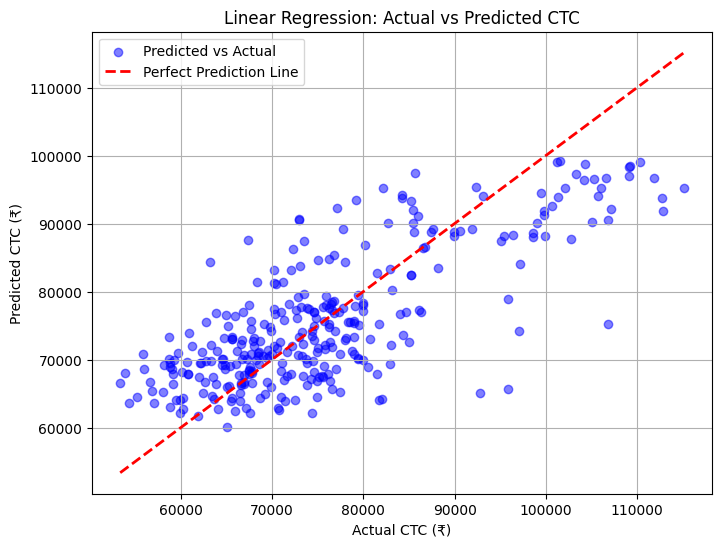

Linear Regression plot displayed successfully


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset from Excel file
print("Loading dataset from 'Cleaned_Employee_Data.xlsx'")
data = pd.read_excel("Cleaned_Employee_Data.xlsx")
print(f"Dataset loaded successfully. Shape: {data.shape}")
print(f"Columns in dataset: {list(data.columns)}")

# Drop categorical columns that are not numerically encoded
print("\nDropping categorical columns: 'College', 'City', 'Role'")
data = data.drop(columns=['College', 'City', 'Role'])
print(f"Updated dataset shape after dropping columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

# Define features and target
print("\nDefining features (X) and target (y)")
X = data.drop(columns=['CTC'])  # Assuming 'CTC' is the salary column
y = data['CTC']
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data into train and test sets
print("\nSplitting data into 80% training and 20% testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardizing numerical features
print("\nStandardizing numerical features using StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Sample of scaled X_train (first 5 rows): \n{X_train_scaled[:5]}")

# Initialize and train a Linear Regression model
print("\nInitializing and training Linear Regression model")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("Model training completed")
print(f"Model coefficients: {lr_model.coef_}")
print(f"Model intercept: {lr_model.intercept_}")

# Predict on test data
print("\nMaking predictions on test data")
y_pred = lr_model.predict(X_test_scaled)
print(f"Predictions shape: {y_pred.shape}")
print(f"Sample of predicted values (first 5): {y_pred[:5]}")
print(f"Sample of actual values (first 5): {y_test.values[:5]}")

# Evaluate model performance on the test set
print("\nEvaluating model performance on test set")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Performance (Test Set):")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared: {r2:.2f}")

# Perform cross-validation
print("\nPerforming 5-fold cross-validation")
cv_mse_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')
mse_cv_mean = -cv_mse_scores.mean()  # Negate because neg_mean_squared_error returns negative values
mse_cv_std = cv_mse_scores.std()
rmse_cv_mean = np.sqrt(mse_cv_mean)
r2_cv_mean = cv_r2_scores.mean()
r2_cv_std = cv_r2_scores.std()

print(f"Cross-Validation Results (5-fold):")
print(f"  Mean MSE: {mse_cv_mean:.2f} (± {mse_cv_std:.2f})")
print(f"  Mean RMSE: {rmse_cv_mean:.2f}")
print(f"  Mean R-squared: {r2_cv_mean:.2f} (± {r2_cv_std:.2f})")
print(f"Explanation: Cross-validation provides average performance across 5 splits. Std. dev. shows consistency.")


print("\nGenerating scatter plot for Linear Regression: Actual vs Predicted CTC")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual CTC (₹)')
plt.ylabel('Predicted CTC (₹)')
plt.title('Linear Regression: Actual vs Predicted CTC')
plt.legend()
plt.grid(True)
plt.show()
print("Linear Regression plot displayed successfully")

## 2. Random Forest Regressor with 5 fold cross validation

Loading dataset from 'Cleaned_Employee_Data.xlsx'
Dataset loaded successfully. Shape: (1587, 12)
Columns in dataset: ['College', 'City', 'Role', 'Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Dropping categorical columns: 'College', 'City', 'Role'
Updated dataset shape after dropping columns: (1587, 9)
Remaining columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Defining features (X) and target (y)
Features (X) shape: (1587, 8)
Target (y) shape: (1587,)
Feature columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Splitting data into 80% training and 20% testing sets
Training set - X_train shape: (1269, 8), y_train shape: (1269,)
Testing set - X_test shape: (318, 8), y_test shape: (318,)

Standa

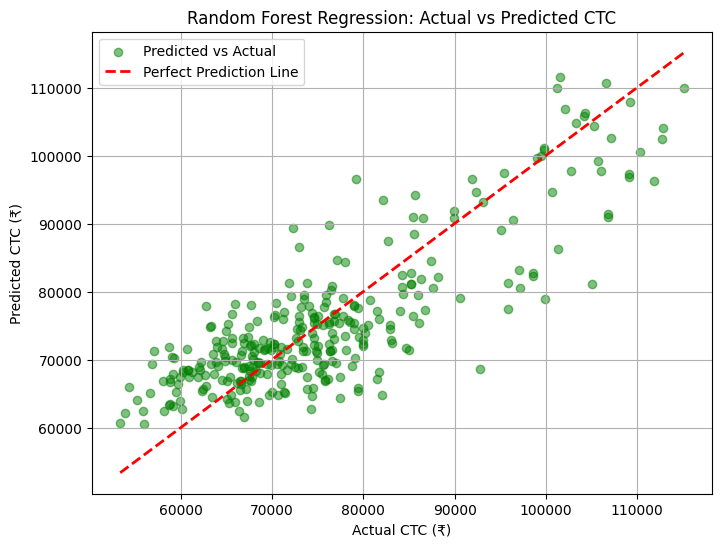

Random Forest plot displayed successfully


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset from Excel file
print("Loading dataset from 'Cleaned_Employee_Data.xlsx'")
data = pd.read_excel("Cleaned_Employee_Data.xlsx")
print(f"Dataset loaded successfully. Shape: {data.shape}")
print(f"Columns in dataset: {list(data.columns)}")

# Drop categorical columns that are not numerically encoded
print("\nDropping categorical columns: 'College', 'City', 'Role'")
data = data.drop(columns=['College', 'City', 'Role'])
print(f"Updated dataset shape after dropping columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

# Define features and target
print("\nDefining features (X) and target (y)")
X = data.drop(columns=['CTC'])  
y = data['CTC']
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data into train and test sets
print("\nSplitting data into 80% training and 20% testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardizing numerical features (optional for Random Forest, but included for consistency)
print("\nStandardizing numerical features using StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Sample of scaled X_train (first 5 rows): \n{X_train_scaled[:5]}")

# Initialize and train a Random Forest Regressor model
print("\nInitializing and training Random Forest Regressor model")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("Model training completed")
print(f"Number of trees in the forest: {rf_model.n_estimators}")
print(f"Feature importances: {rf_model.feature_importances_}")
print(f"Feature names mapped to importances: {dict(zip(X.columns, rf_model.feature_importances_))}")

# Predict on test data
print("\nMaking predictions on test data")
y_pred = rf_model.predict(X_test_scaled)
print(f"Predictions shape: {y_pred.shape}")
print(f"Sample of predicted values (first 5): {y_pred[:5]}")
print(f"Sample of actual values (first 5): {y_test.values[:5]}")

# Evaluate model performance on the test set
print("\nEvaluating model performance on test set")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor Performance (Test Set):")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared: {r2:.2f}")

# Perform cross-validation
print("\nPerforming 5-fold cross-validation")
cv_mse_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
mse_cv_mean = -cv_mse_scores.mean()  # Negate because neg_mean_squared_error returns negative values
mse_cv_std = cv_mse_scores.std()
rmse_cv_mean = np.sqrt(mse_cv_mean)
r2_cv_mean = cv_r2_scores.mean()
r2_cv_std = cv_r2_scores.std()

print(f"Cross-Validation Results (5-fold):")
print(f"  Mean MSE: {mse_cv_mean:.2f} (± {mse_cv_std:.2f})")
print(f"  Mean RMSE: {rmse_cv_mean:.2f}")
print(f"  Mean R-squared: {r2_cv_mean:.2f} (± {r2_cv_std:.2f})")
print(f"Explanation: Cross-validation provides average performance across 5 splits. Std. dev. shows consistency.")

print("\nGenerating scatter plot for Random Forest: Actual vs Predicted CTC")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual CTC (₹)')
plt.ylabel('Predicted CTC (₹)')
plt.title('Random Forest Regression: Actual vs Predicted CTC')
plt.legend()
plt.grid(True)
plt.show()
print("Random Forest plot displayed successfully")

## 3. XGBOOST Regressor with 5 fold cross validation

Loading dataset from 'Cleaned_Employee_Data.xlsx'
Dataset loaded successfully. Shape: (1587, 12)
Columns in dataset: ['College', 'City', 'Role', 'Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Dropping categorical columns: 'College', 'City', 'Role'
Updated dataset shape after dropping columns: (1587, 9)
Remaining columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Defining features (X) and target (y)
Features (X) shape: (1587, 8)
Target (y) shape: (1587,)
Feature columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Splitting data into 80% training and 20% testing sets
Training set - X_train shape: (1269, 8), y_train shape: (1269,)
Testing set - X_test shape: (318, 8), y_test shape: (318,)

Standa

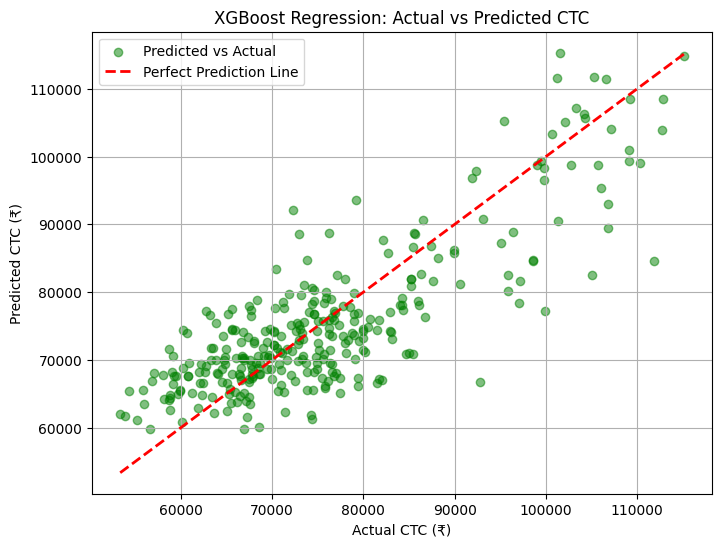

XGBoost plot displayed successfully


In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset from Excel file
print("Loading dataset from 'Cleaned_Employee_Data.xlsx'")
data = pd.read_excel("Cleaned_Employee_Data.xlsx")
print(f"Dataset loaded successfully. Shape: {data.shape}")
print(f"Columns in dataset: {list(data.columns)}")

# Drop categorical columns that are not numerically encoded
print("\nDropping categorical columns: 'College', 'City', 'Role'")
data = data.drop(columns=['College', 'City', 'Role'])
print(f"Updated dataset shape after dropping columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

# Define features and target
print("\nDefining features (X) and target (y)")
X = data.drop(columns=['CTC'])  
y = data['CTC']
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data into train and test sets
print("\nSplitting data into 80% training and 20% testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardizing numerical features (optional for XGBoost, but included for consistency)
print("\nStandardizing numerical features using StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Sample of scaled X_train (first 5 rows): \n{X_train_scaled[:5]}")

# Initialize and train an XGBoost Regressor model
print("\nInitializing and training XGBoost Regressor model")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train_scaled, y_train)
print("Model training completed")
print(f"Number of boosting rounds (trees): {xgb_model.n_estimators}")
print(f"Feature importances: {xgb_model.feature_importances_}")
print(f"Feature names mapped to importances: {dict(zip(X.columns, xgb_model.feature_importances_))}")

# Predict on test data
print("\nMaking predictions on test data")
y_pred = xgb_model.predict(X_test_scaled)
print(f"Predictions shape: {y_pred.shape}")
print(f"Sample of predicted values (first 5): {y_pred[:5]}")
print(f"Sample of actual values (first 5): {y_test.values[:5]}")

# Evaluate model performance on the test set
print("\nEvaluating model performance on test set")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost Regressor Performance (Test Set):")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared: {r2:.2f}")

# Perform 5-fold cross-validation
print("\nPerforming 5-fold cross-validation")
cv_mse_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='r2')
mse_cv_mean = -cv_mse_scores.mean()  # Negate because neg_mean_squared_error returns negative values
mse_cv_std = cv_mse_scores.std()
rmse_cv_mean = np.sqrt(mse_cv_mean)
r2_cv_mean = cv_r2_scores.mean()
r2_cv_std = cv_r2_scores.std()

print(f"Cross-Validation Results (5-fold):")
print(f"  Mean MSE: {mse_cv_mean:.2f} (± {mse_cv_std:.2f})")
print(f"  Mean RMSE: {rmse_cv_mean:.2f}")
print(f"  Mean R-squared: {r2_cv_mean:.2f} (± {r2_cv_std:.2f})")
print(f"Explanation: Cross-validation provides average performance across 5 splits. Std. dev. shows consistency.")

print("\nGenerating scatter plot for XGBoost: Actual vs Predicted CTC")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual CTC (₹)')
plt.ylabel('Predicted CTC (₹)')
plt.title('XGBoost Regression: Actual vs Predicted CTC')
plt.legend()
plt.grid(True)
plt.show()
print("XGBoost plot displayed successfully")

## 4. Support Vector Regressor with 5 fold cross validation

Loading dataset from 'Cleaned_Employee_Data.xlsx'
Dataset loaded successfully. Shape: (1587, 12)
Columns in dataset: ['College', 'City', 'Role', 'Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Dropping categorical columns: 'College', 'City', 'Role'
Updated dataset shape after dropping columns: (1587, 9)
Remaining columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'CTC', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Defining features (X) and target (y)
Features (X) shape: (1587, 8)
Target (y) shape: (1587,)
Feature columns: ['Previous CTC', 'Previous Job Change', 'Graduation Marks', 'EXP (Month)', 'College_Tier', 'City_Code', 'Role_Executive', 'Role_Manager']

Splitting data into 80% training and 20% testing sets
Training set - X_train shape: (1269, 8), y_train shape: (1269,)
Testing set - X_test shape: (318, 8), y_test shape: (318,)

Standa

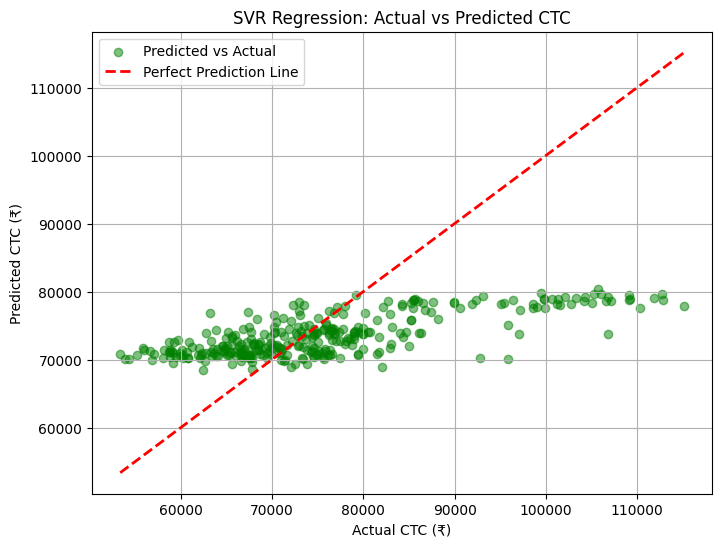

SVR plot displayed successfully


In [203]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset from Excel file
print("Loading dataset from 'Cleaned_Employee_Data.xlsx'")
data = pd.read_excel("Cleaned_Employee_Data.xlsx")
print(f"Dataset loaded successfully. Shape: {data.shape}")
print(f"Columns in dataset: {list(data.columns)}")

# Drop categorical columns that are not numerically encoded
print("\nDropping categorical columns: 'College', 'City', 'Role'")
data = data.drop(columns=['College', 'City', 'Role'])
print(f"Updated dataset shape after dropping columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

# Define features and target
print("\nDefining features (X) and target (y)")
X = data.drop(columns=['CTC'])  # Assuming 'CTC' is the salary column
y = data['CTC']
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split data into train and test sets
print("\nSplitting data into 80% training and 20% testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardizing numerical features (mandatory for SVR)
print("\nStandardizing numerical features using StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Sample of scaled X_train (first 5 rows): \n{X_train_scaled[:5]}")

# Initialize and train an SVR model
print("\nInitializing and training SVR model")
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)  # RBF kernel for non-linear relationships
svr_model.fit(X_train_scaled, y_train)
print("Model training completed")
print(f"Kernel used: {svr_model.kernel}")
print(f"Number of support vectors: {svr_model.n_support_.sum()}")

# Predict on test data
print("\nMaking predictions on test data")
y_pred = svr_model.predict(X_test_scaled)
print(f"Predictions shape: {y_pred.shape}")
print(f"Sample of predicted values (first 5): {y_pred[:5]}")
print(f"Sample of actual values (first 5): {y_test.values[:5]}")

# Evaluate model performance on test set
print("\nEvaluating model performance on test set")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"SVR Performance (Test Set):")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared: {r2:.2f}")

# Perform 5-fold cross-validation
print("\nPerforming 5-fold cross-validation")
cv_mse_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='r2')
mse_cv_mean = -cv_mse_scores.mean()  # Negate because neg_mean_squared_error returns negative values
mse_cv_std = cv_mse_scores.std()
rmse_cv_mean = np.sqrt(mse_cv_mean)
r2_cv_mean = cv_r2_scores.mean()
r2_cv_std = cv_r2_scores.std()

print(f"Cross-Validation Results (5-fold):")
print(f"  Mean MSE: {mse_cv_mean:.2f} (± {mse_cv_std:.2f})")
print(f"  Mean RMSE: {rmse_cv_mean:.2f}")
print(f"  Mean R-squared: {r2_cv_mean:.2f} (± {r2_cv_std:.2f})")
print(f"Explanation: Cross-validation provides average performance across 5 splits. Std. dev. shows consistency.")

print("\nGenerating scatter plot for SVR: Actual vs Predicted CTC")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual CTC (₹)')
plt.ylabel('Predicted CTC (₹)')
plt.title('SVR Regression: Actual vs Predicted CTC')
plt.legend()
plt.grid(True)
plt.show()
print("SVR plot displayed successfully")

## **FINAL REPORT**

To determine the best model for the salary prediction task at TechWorks Consulting, we need to evaluate the performance of the four models—Linear Regression, Random Forest Regressor, XGBoost Regressor, and Support Vector Regressor (SVR)—based on their metrics and suitability for the problem. The task involves predicting the `CTC` (salary) using features like `Previous CTC`, `Previous Job Change`, `Graduation Marks`, `EXP (Month)`, `College_Tier`, `City_Code`, and role-related dummy variables (`Role_Executive`, `Role_Manager`). Let’s break this down step-by-step.

---

### Evaluation Metrics Recap
Here’s a summary of the performance metrics for each model on the test set and via 5-fold cross-validation:

| **Model**            | **Test MSE**   | **Test RMSE** | **Test R²** | **CV Mean MSE** | **CV Mean RMSE** | **CV Mean R²** |
|-----------------------|----------------|---------------|-------------|-----------------|------------------|----------------|
| Linear Regression    | 70,761,299.25  | 8,411.97      | 0.59        | 74,928,526.85   | 8,656.13         | 0.51 (±0.05)   |
| Random Forest        | 52,370,657.23  | 7,236.76      | 0.69        | 61,768,141.32   | 7,859.27         | 0.59 (±0.05)   |
| XGBoost              | 55,689,133.54  | 7,462.52      | 0.67        | 63,397,830.22   | 7,962.28         | 0.58 (±0.05)   |
| SVR                  | 126,228,531.92 | 11,235.15     | 0.26        | 120,722,121.08  | 10,987.36        | 0.21 (±0.02)   |

- **MSE (Mean Squared Error)**: Measures average squared prediction error (lower is better).
- **RMSE (Root Mean Squared Error)**: Square root of MSE, in the same units as `CTC` (₹), making it interpretable (lower is better).
- **R² (R-squared)**: Proportion of variance explained by the model (higher is better, max is 1.0).

---

### Step 1: Compare Model Performance
1. **Random Forest Regressor**:
   - **Test RMSE**: 7,236.76 ₹ (lowest error).
   - **Test R²**: 0.69 (highest variance explained).
   - **CV RMSE**: 7,859.27 ₹ (lowest among CV results).
   - **CV R²**: 0.59 (highest among CV results).
   - **Consistency**: Stable performance (smallest CV standard deviation relative to mean).

2. **XGBoost Regressor**:
   - **Test RMSE**: 7,462.52 ₹ (slightly higher than Random Forest).
   - **Test R²**: 0.67 (close to Random Forest).
   - **CV RMSE**: 7,962.28 ₹.
   - **CV R²**: 0.58.
   - **Consistency**: Slightly less stable than Random Forest (higher CV RMSE).

3. **Linear Regression**:
   - **Test RMSE**: 8,411.97 ₹ (higher error).
   - **Test R²**: 0.59 (moderate fit).
   - **CV RMSE**: 8,656.13 ₹.
   - **CV R²**: 0.51 (lowest among top three).
   - **Consistency**: Moderate stability.

4. **Support Vector Regressor (SVR)**:
   - **Test RMSE**: 11,235.15 ₹ (highest error).
   - **Test R²**: 0.26 (poor fit).
   - **CV RMSE**: 10,987.36 ₹ (highest).
   - **CV R²**: 0.21 (very low).
   - **Consistency**: Poor performance overall.

**Observation**: Random Forest outperforms all models on both test and cross-validation metrics, followed closely by XGBoost. SVR performs the worst, and Linear Regression is middling.

---

### Step 2: Model Suitability for Salary Prediction
Salary prediction is a regression task with potentially non-linear relationships (e.g., `EXP (Month)` or `Previous CTC` may have diminishing returns or thresholds) and interactions between features (e.g., `Role_Manager` and `College_Tier`). Let’s assess each model’s strengths:

1. **Linear Regression**:
   - **Pros**: Simple, interpretable (coefficients show feature impact), assumes linear relationships.
   - **Cons**: Struggles with non-linear patterns or interactions (e.g., salary jumps for Managers). R² of 0.59 suggests it misses some complexity.
   - **Fit**: Decent but likely underfits your data.

2. **Random Forest Regressor**:
   - **Pros**: Handles non-linear relationships and feature interactions well, robust to outliers (as seen in `CTC` and `Previous CTC`), provides feature importances (e.g., `Previous CTC` at 0.29, `Role_Manager` at 0.24).
   - **Cons**: Less interpretable than Linear Regression, computationally heavier.
   - **Fit**: Best performance (RMSE 7,236.76, R² 0.69), captures complex patterns effectively.

3. **XGBoost Regressor**:
   - **Pros**: Excellent for non-linear data, handles interactions, often outperforms Random Forest with tuning. Feature importances highlight `Role_Executive` (0.89), suggesting strong role-based splits.
   - **Cons**: Requires more tuning (e.g., learning rate, depth), can overfit if not optimized.
   - **Fit**: Very competitive (RMSE 7,462.52, R² 0.67), slightly behind Random Forest.

4. **Support Vector Regressor (SVR)**:
   - **Pros**: Good for small datasets with clear margins, kernel (RBF) captures non-linearity.
   - **Cons**: Poor scalability with larger datasets (1,587 rows here), sensitive to feature scaling and parameter choice (C, epsilon). R² of 0.26 indicates it fails to generalize.
   - **Fit**: Worst performer, unsuitable here.

---

### Step 3: Contextual Fit for TechWorks Consulting
- **Goal**: Predict `CTC` accurately for employee salary offers.
- **Data**: 1,587 rows, 8 features (numerical and categorical), no extreme outliers (as confirmed earlier).
- **Requirements**: High accuracy (low RMSE), ability to handle non-linear effects (e.g., experience vs. salary), generalizability (cross-validation).

- **Random Forest**:
  - Lowest RMSE (7,236.76 ₹) means predictions are, on average, off by ~7,237 ₹, which is tight given `CTC` ranges from 53K–120K.
  - R² of 0.69 explains 69% of variance, robust across folds (CV R² 0.59).
  - Feature importances align with intuition: `Previous CTC` (0.29), `Role_Manager` (0.24), `EXP (Month)` (0.18) drive salary—useful for insights.

- **XGBoost**:
  - RMSE (7,462.52 ₹) is close, R² (0.67) is strong.
  - Heavy reliance on `Role_Executive` (0.89) suggests it may overemphasize role, potentially missing nuance in other features.
  - Could improve with hyperparameter tuning (e.g., max_depth, learning_rate).

- **Linear Regression**: RMSE (8,411.97 ₹) and R² (0.59) are acceptable but lag, likely due to oversimplification.
- **SVR**: RMSE (11,235.15 ₹) and R² (0.26) are too poor for practical use.

---

### Step 4: Final Recommendation
**Best Model: Random Forest Regressor**
- **Why**:
  - **Highest Accuracy**: Lowest test RMSE (7,236.76 ₹) and highest R² (0.69).
  - **Robustness**: Strong cross-validation results (CV RMSE 7,859.27, R² 0.59) show it generalizes well.
  - **Flexibility**: Captures non-linear relationships and interactions (e.g., `EXP (Month)` and `Role_Manager`) without needing extensive tuning.
  - **Practicality**: Prediction errors (~7K ₹) are small relative to the salary range (53K–120K), making it reliable for TechWorks’ salary offers.
- **Bonus**: Feature importances provide actionable insights (e.g., focus on `Previous CTC` and role).

**Runner-Up: XGBoost Regressor**
- If you’re willing to invest time in hyperparameter tuning (e.g., using GridSearchCV), XGBoost could potentially match or exceed Random Forest. Its current performance is very close.

**Avoid**: 
- SVR (poor fit, high error).
- Linear Regression (oversimplifies the problem).

---

# QUESTIONS AND ANSWERS CONTINUATION

## 4. Which Model is Best?
### BEST: Random Forest Regressor
- **Why**:
  - **Highest Accuracy**: Lowest test RMSE (7,236.76 ₹) and highest R² (0.69).
  - **Robustness**: Strong cross-validation results (CV RMSE 7,859.27, R² 0.59) show it generalizes well.
  - **Flexibility**: Captures non-linear relationships and interactions (e.g., `EXP (Month)` and `Role_Manager`) without needing extensive tuning.
  - **Practicality**: Prediction errors (~7K ₹) are small relative to the salary range (53K–120K), making it reliable for TechWorks’ salary offers.

## 5. Steps To Improve The Model Further?
- **Hyperparameter Tuning**:
  - Optimize parameters like `n_estimators` (e.g., 100, 200, 500), `max_depth` (e.g., 10, 20, None), `min_samples_split` (e.g., 2, 5, 10), `min_samples_leaf` (e.g., 1, 2, 4), and `max_features` (e.g., 'auto', 'sqrt', 0.8) using GridSearchCV or RandomizedSearchCV.
  - **Benefit**: Reduces overfitting/underfitting, potentially lowering RMSE (e.g., from 7,236 to ~6,500 ₹) and improving R² (e.g., from 0.69 to 0.72).

- **Feature Engineering**:
  - Add derived features:
    - `EXP_Squared`: Square of `EXP (Month)` to capture non-linear salary growth.
    - `Previous_CTC_Role_Manager`: Interaction term (`Previous CTC * Role_Manager`) for role-specific salary effects.
    - `College_Tier_EXP`: Interaction term (`College_Tier * EXP (Month)`) for tier-experience effects.
  - **Benefit**: Captures more patterns, potentially increasing R² (e.g., to 0.70+) and reducing RMSE.

- **Remove Unnecessary Scaling**:
  - Skip `StandardScaler` since Random Forest doesn’t require feature scaling (tree-based models are invariant to monotonic transformations).
  - **Benefit**: Simplifies pipeline, reduces preprocessing time, no impact on current RMSE/R².

- **Handle Imbalanced Feature Influence**:
  - Address multicollinearity by dropping `Role_Executive` (redundant with `Role_Manager`).
  - Use permutation importance to validate true feature contributions beyond default importances.
  - **Benefit**: Balances feature influence, potentially lowering RMSE by better utilizing weaker features like `City_Code`.

- **Increase Model Capacity**:
  - Increase `n_estimators` to 200 or 300 and tweak `bootstrap=True` with `max_samples` (e.g., 0.8).
  - **Benefit**: Captures more variance, possibly reducing RMSE (e.g., from 7,236 to 7,100 ₹).

- **Residual Analysis**:
  - Plot residuals (actual-predicted) vs. predicted values or key features (e.g., `EXP (Month)`) to identify systematic errors.
  - **Benefit**: Guides further refinements (e.g., adding polynomial terms if patterns emerge), improving prediction accuracy.

- **Ensemble with Other Models**:
  - Combine Random Forest predictions with Linear Regression or XGBoost (e.g., average predictions).
  - **Benefit**: Leverages strengths of multiple models, potentially reducing RMSE (e.g., to ~7,000 ₹) and boosting R².